<a href="https://colab.research.google.com/github/kmsekgothe/load-shortfall-regression-predict-api/blob/master/KaggleNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 12 - Advanced Classification Predict

© Explore Data Science Academy

---

### Introduction: 
---

### Predict Overview




<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages

In this section we import the necessary libraries needed for Data Analysis, Data Manipulation, Data Visualization and Model Building.

In [1]:
# libraries needed for Data Analysis and  Data Manipulation
import numpy as np # used to evaluate arrays
import pandas as pd # used to create and utilise tabular data ie Pandas DataFrame

# libraries to be used for Data Visualization
import matplotlib.pyplot as plt # used to visualize data
import seaborn as sns # used to visualize data
from matplotlib import rc
%matplotlib inline

# Libraries for data preparation and model building
import sklearn
import re
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
import string
import requests
from time import sleep
from nltk.corpus import stopwords
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Suppress cell warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# !pip install wordcloud

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

- Loading of Test and Train datasets. 
- Concatenate the datasets to ensure Data Engineering is done only once (for convenience). 
- Dataframes will then be split later on when needed.

In [2]:
df = pd.read_csv('train.csv') # load the data
df_test = pd.read_csv('test_with_no_labels.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Perform basic analysis on the dataframe.

In [3]:
# Basic Train Analysis

df.shape # train DataFrame has 15 819 rows and 3 columns

(15819, 3)

In [4]:
df.head()

sentiment  \
0          1   
1          1   
2          2   
3          1   
4          1   

                                                                                                                                        message  \
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable   
1                                                                                It's not like we lack evidence of anthropogenic global warming   
2  RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…   
3                                           #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD   
4                    RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight   

   tweetid  
0   625221  
1   126103  
2   698562  
3   573736  
4   466954

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [6]:
df['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

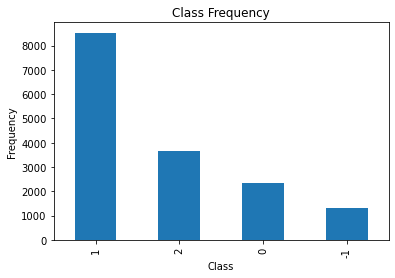

In [7]:
df['sentiment'].value_counts().plot(kind = 'bar')
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [8]:
unique, counts = np.unique(df['sentiment'], return_counts=True)
unique_counts_dict = {'Unique Count':
             {
                 "Class -1": counts[0],
                "Class 0": counts[1],
              "Class 1": counts[2],
              "Class 2": counts[3]
              }
             }
unique_count = pd.DataFrame(data=unique_counts_dict)
unique_count.sort_values(by='Unique Count', ascending=False)

Unique Count
Class 1           8530
Class 2           3640
Class 0           2353
Class -1          1296

Class Description:

- 2 News: the tweet links to factual news about climate change
- 1 Pro: the tweet supports the belief of man-made climate change
- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
- -1 Anti: the tweet does not believe in man-made climate change

Note the imbalance here: there are over 8000 observations in class 1 and only 1296 observations in class -1.

In [9]:
# Basic Test Analysis

df_test.shape # test DataFrame has 10 546 rows and 2 columns

(10546, 2)

In [10]:
df_test.head()

message  \
0                    Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq   
1         Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj   
2  The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..   
3  @Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax   
4                                                             RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican   

   tweetid  
0   169760  
1    35326  
2   224985  
3   476263  
4   872928

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


<a id="three"></a>
## 3. Data Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

#### Data Cleaning and Formatting
 

Before we can do **Exploratory Data Analysis** (EDA) in section 4, we need to ensure that our data is in the correct format that can actually be used.

In [12]:
# Better view of what's in the dataset
for i, row in df.iterrows():
    print(i)
    print(row)
    print("\n")

0
sentiment                                                                                                                                               1
message      PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable
tweetid                                                                                                                                            625221
Name: 0, dtype: object


1
sentiment                                                                 1
message      It's not like we lack evidence of anthropogenic global warming
tweetid                                                              126103
Name: 1, dtype: object


2
sentiment                                                                                                                                               2
message      RT @RawStory: Researchers say we have three years to act on climate change before it’s 

Name: 282, dtype: object


283
sentiment                                                                                                                                               -1
message      RT @HarmlessYardDog: 21 kids aged 9 to 20 are suing the Trump over climate change ������\n\n&gt;Leftist are a Disease https://t.co/gdfHOUiK1E
tweetid                                                                                                                                             684619
Name: 283, dtype: object


284
sentiment                                                                       0
message      How can man say we can stop global warming by putting our AC outside
tweetid                                                                    880134
Name: 284, dtype: object


285
sentiment                                                                                                                                                   2
message      RT @DrBobBullard: Ã¢â‚¬Ëœ

Name: 469, dtype: object


470
sentiment                                                                                                                                                            0
message      RT @TheNextWeb: National GeographicÃ¢â‚¬â„¢s climate change documentary with Leonardo DiCaprio is now on YouTube https://t.co/qMsxAyKcjo https://tÃ¢â‚¬Â¦
tweetid                                                                                                                                                         798960
Name: 470, dtype: object


471
sentiment                                                                                                                                 2
message      RT @aireguru: California knocks Trump as it extends climate change effort: SAN FRANCISCO (AP) — Gov.… https://t.co/EPBSdMNTT1…
tweetid                                                                                                                              708842
Name: 471, dtype:

Name: 774, dtype: object


775
sentiment                                                                                                   1
message      More evidence climate change has been warning since 1950's: https://t.co/hiLtB0kssg via @youtube
tweetid                                                                                                 81297
Name: 775, dtype: object


776
sentiment                                                                                                                                          1
message      RT @NYGovCuomo: With or without Washington, we're working to aggressively fight climate change. #ParisAgreement https://t.co/xXf5N3BcE0
tweetid                                                                                                                                       775666
Name: 776, dtype: object


777
sentiment                                                                                                                         

1046
sentiment                                                                                                                           -1
message      Whistleblower admits scientists manipulated data, making global warming seem worse to help Obama  https://t.co/87P2MchctX
tweetid                                                                                                                         545909
Name: 1046, dtype: object


1047
sentiment                                                                                                                 0
message      From the blog: Environmentalism isn't just worrying about #climate change https://t.co/Rk4KHecDxB #MondayBlogs
tweetid                                                                                                              408105
Name: 1047, dtype: object


1048
sentiment                                                                                     0
message      RT @jdisblack: your hairline suffering from

Name: 1245, dtype: object


1246
sentiment                                                                                              1
message      President elect thinks climate change is a hoax made by the Chinese https://t.co/IZwOdx7z1m
tweetid                                                                                           347977
Name: 1246, dtype: object


1247
sentiment                                                                                                                                              2
message      RT @Lulihar99: UK to 'scale down' climate change and illegal wildlife measures to bring in post-Brexit trade - secret documents https://t.…
tweetid                                                                                                                                           884576
Name: 1247, dtype: object


1248
sentiment                                                                                                                      

sentiment                                                                                             2
message      Coastal inundation reveals the upside of climate change https://t.co/w3ViiO4LQd via @WIRED
tweetid                                                                                          228256
Name: 1450, dtype: object


1451
sentiment                                                                                                                                               0
message      @wildebees @gelykburger @ErnstRoets you can't disprove irrelevant arguments just because you don't believe in global warming, the fallacies.
tweetid                                                                                                                                            282819
Name: 1451, dtype: object


1452
sentiment                                                                                                                   2
message      In executive order Tu

Name: 1681, dtype: object


1682
sentiment                                                                                                                   0
message      suddenly the bees arent dying, the earth is beautiful and living, global warming stopped https://t.co/7Wmi1Or1vA
tweetid                                                                                                                981454
Name: 1682, dtype: object


1683
sentiment                                                                                                                                               1
message      RT @FredKrupp: BREAKING (and breathtakingly wrong): Pruitt says “I would not agree” Co2 “a primary contributor” to global warming https://t…
tweetid                                                                                                                                            373837
Name: 1683, dtype: object


1684
sentiment                                                    

Name: 1919, dtype: object


1920
sentiment                                                                                                                                               1
message      RT @SunApology: £1 billion of our taxes was given to the homophobic, climate change denying DUP. In that context, I couldn't GAF what we pa…
tweetid                                                                                                                                            386609
Name: 1920, dtype: object


1921
sentiment                                                                                                                                       2
message      Unlike many Republican leaders, European conservatives don’t deny climate change. #news #follow #rt #retweet https://t.co/g7C1QHZRnS
tweetid                                                                                                                                    276561
Name: 1921, dtype: object


1922
s


2135
sentiment                                                                                                                                              2
message      RT @SafetyPinDaily: Chairman of the House science committee says climate change is a good thing | By @c_m_dangelo \nhttps://t.co/osRDto8E32
tweetid                                                                                                                                           624210
Name: 2135, dtype: object


2136
sentiment                                                                                                                                                     1
message      RT @BernieSanders: The stakes are enormously high. Literally, in terms of climate change, the future of the planet is at stake. https://t.cÃ¢â‚¬Â¦
tweetid                                                                                                                                                  335988
Name: 2136, dtype: obj

Name: 2429, dtype: object


2430
sentiment                                                                                                                                  2
message      RT @CNN: President Trump dramatically changes the US approach to climate change https://t.co/pNKLybArjd https://t.co/4IDI5w2QbH
tweetid                                                                                                                               191132
Name: 2430, dtype: object


2431
sentiment                                                                                                                                             1
message      RT @MissLilySummers: Except pushing LGBT+ rights, addressing climate change, opposing Russia's aggression etc etc. https://t.co/77LxliH9I0
tweetid                                                                                                                                          648960
Name: 2431, dtype: object


2432
sentiment             

Name: 2615, dtype: object


2616
sentiment                                                                                                               1
message      United in the fight against climate change. Take the pledge #COP22 #EarthtoMarrakesh https://t.co/fTSKecSShd
tweetid                                                                                                            763098
Name: 2616, dtype: object


2617
sentiment                                                                                                            0
message      So, how lovely are we gonna keep having the 'climate change is real &amp; now vs. CC is a myth' argument?
tweetid                                                                                                           3336
Name: 2617, dtype: object


2618
sentiment                                                                                                                                                     1
message      RT @i

Name: 2830, dtype: object


2831
sentiment                                                                                                    0
message      Kentut dari hewan-hewan purba adalah penyebab utama global warming di zaman dinosaurus. [BBCnews]
tweetid                                                                                                 469251
Name: 2831, dtype: object


2832
sentiment                                                                                                                                          1
message      RT @KamalaHarris: I stand with @JerryBrownGov in saying that California will not back down on climate change. \nhttps://t.co/xP8Y6eSmyx
tweetid                                                                                                                                       928682
Name: 2832, dtype: object


2833
sentiment                                                                                                                

3084
sentiment                                                                                                                                               1
message      RT @heathermg: 'Energy department rejects Trump's request to name climate change workers.' Good. Stay strong, fascist resistance. https://t…
tweetid                                                                                                                                            673197
Name: 3084, dtype: object


3085
sentiment                                                                                                                                                     1
message      RT @SethMacFarlane: HRC proposes installing half a billion solar panels by the end of her first term. Trump thinks climate change is a hoaxÃ¢â‚¬Â¦
tweetid                                                                                                                                                   46609
Name: 3085, dtype: o

Name: 3344, dtype: object


3345
sentiment                                                                                                                                 2
message      RT @AP_Politics: BREAKING: President Donald Trump signs executive order rolling back Obama's efforts to combat climate change.
tweetid                                                                                                                              805749
Name: 3345, dtype: object


3346
sentiment                                                                                                                                      1
message      RT @manjusrii: At what point do we acknowledge climate change? When we've run out of names for cat 4 and 5 hurricanes? Houston sin…
tweetid                                                                                                                                   962267
Name: 3346, dtype: object


3347
sentiment                                     

3592
sentiment                                                                                                                                                           1
message      RT @TPW_foundation: Leo DiCaprio's new film 'Before the Flood' is a sweeping look at climate change! 'Planet EÃ¢â‚¬Â¦ https://t.co/RgvRQYcn82 httÃ¢â‚¬Â¦
tweetid                                                                                                                                                        792362
Name: 3592, dtype: object


3593
sentiment                                                                                                                                         0
message      RT @SkySporfsNews: BREAKING: N'Golo Kante's heat maps have been declared as the prime reason for global warming over the past 2 years…
tweetid                                                                                                                                       93988
Name: 3593, dtype: o



3795
sentiment                                                                                                                                                 1
message      RT @funder: Watch this video.\n\nIf you don't think #HurricaneHarvey has to do with climate change, you must be a Trump supporter. https://t.…
tweetid                                                                                                                                              295134
Name: 3795, dtype: object


3796
sentiment                                                                                                                      2
message      RT @anthroworks: Indigenous Canadians face a crisis as climate change eats away island home https://t.co/buFK6n1hUt
tweetid                                                                                                                   226262
Name: 3796, dtype: object


3797
sentiment                                                               



3932
sentiment                                                                               -1
message      @YTICBT \nnot saying ...no global warming\nbut REALLY QUESTION...\n• MAN MADE
tweetid                                                                             231673
Name: 3932, dtype: object


3933
sentiment                                                                                                                                       1
message      I pledge to urge U.S. leaders to maintain our momentum in the fight against global warming... https://t.co/5fWWOlkHdY #globalcitizen
tweetid                                                                                                                                    323777
Name: 3933, dtype: object


3934
sentiment                                                                 0
message      @philklotzbach gotta be global warming. They need some excuse?
tweetid                                                         

4135
sentiment                                                                                                         1
message      RT @EarthVoteOrg: Capitalism is the primary factor exacerbating climate change https://t.co/Ptc6BKfjHy
tweetid                                                                                                      226785
Name: 4135, dtype: object


4136
sentiment                                                                                                                                                   1
message      RT @MrStevenCree: Sorry. Maybe I should have been sexist, racist, xenophobic, wall building &amp; denied climate change exists. Is that cÃ¢â‚¬Â¦
tweetid                                                                                                                                                754092
Name: 4136, dtype: object


4137
sentiment                                                                                              2
me

Name: 4381, dtype: object


4382
sentiment                                                                      0
message      I feel like climate change is personally attacking canada this week
tweetid                                                                   887470
Name: 4382, dtype: object


4383
sentiment                                                                                                                                                   2
message      RT @highcountrynews: A group of artists show the effects of deindustrialization &amp; climate change. @PacificStand explains: https://t.co/5aei…
tweetid                                                                                                                                                166966
Name: 4383, dtype: object


4384
sentiment                                                                                                                                           1
message      @pagetrimble, Why are

Name: 4637, dtype: object


4638
sentiment                                                                                                                                         -1
message      RT @USFreedomArmy: Now we know the real reason for the climate change hysteria. Enlist with us at https://t.co/oSPeY3QMpH. Join our pa…
tweetid                                                                                                                                       793233
Name: 4638, dtype: object


4639
sentiment                                                         -1
message      @NBCNightlyNews @ritaloooc69 There is no climate change
tweetid                                                       676035
Name: 4639, dtype: object


4640
sentiment                                                                                                                                            1
message      RT @deleteuracct: NEW @deleteuracct!!!\n\nEp26 - Feeling the Heat\n\n@EricHolthaus 

Name: 4835, dtype: object


4836
sentiment                                                                                                                                                 1
message      RT @SarcasticRover: Happy #EarthDay humans! \n\nI got you a present, but it was climate change and then I remembered you make your own. https…
tweetid                                                                                                                                              180746
Name: 4836, dtype: object


4837
sentiment                                                                                                                                                      1
message      @JolyonMaugham @montie Trump &amp; Brexiters = the false promise of doing away with a major fear/inconvenience: climate change deniers 1 &amp; all.
tweetid                                                                                                                                         

Name: 5016, dtype: object


5017
sentiment                                                                                                                                               2
message      RT @Animal_Watch: Humans on the verge of causing Earth’s fastest climate change in 50m years | Dana Nuccitelli https://t.co/GXQ9xoON7N @gua…
tweetid                                                                                                                                            680712
Name: 5017, dtype: object


5018
sentiment                                                                                                                                                 1
message      RT @Kon__K: He's a self - proclaimed racist, misogynist, climate change denier, homophobe &amp; fascist. \n\nBut she's a woman. #ElectionNight
tweetid                                                                                                                                               50559
Name

Name: 5229, dtype: object


5230
sentiment                                                                                                                                             1
message      RT @rebleber: Don't fool yourself, Trump still thinks climate change is a hoax. He's just making his henchmen do he talking https://t.co/…
tweetid                                                                                                                                          459843
Name: 5230, dtype: object


5231
sentiment                                                                                                                                2
message      RT @ClimateCentral: Corn could be major victim of climate change https://t.co/q7LKXXiX5X via @climate https://t.co/aCYhfQ47c3
tweetid                                                                                                                             738874
Name: 5231, dtype: object


5232
sentiment                   

Name: 5490, dtype: object


5491
sentiment                                                                                                                                                     1
message      RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change https://t.co/SjoFoNÃ¢â‚¬Â¦
tweetid                                                                                                                                                  502536
Name: 5491, dtype: object


5492
sentiment                                                                                                                          -1
message      @curryja @ClimateRealists @indiatimes Don't you know climate change causes everything including acne. Biggest scam ever.
tweetid                                                                                                                         16867
Name: 5492, dtype: object


5493
sentiment          



5711
sentiment                                                                                                                                               1
message      @WoodMackenzie Put a #priceoncarbon and fight climate change by entering @climate-xchange’s #CarbonPricing Awarenes… https://t.co/riMkkRlbrD
tweetid                                                                                                                                            984606
Name: 5711, dtype: object


5712
sentiment                                                                                                                                       2
message      Rex Tillerson used an alias email at Exxon to discuss climate change, New York A.G. says https://t.co/gzJgnJWeFb by #WSJ via @c0nvey
tweetid                                                                                                                                    749370
Name: 5712, dtype: object


5713
sentiment                  

Name: 6007, dtype: object


6008
sentiment                                                                                                                 2
message      #NATO lawmakers warn climate change may worsen Middle East security risks https://t.co/iGLlTrA9wC via @Reuters
tweetid                                                                                                              704624
Name: 6008, dtype: object


6009
sentiment                                                                                                                          1
message      RT @pdacosta: Trump's Defense Secretary thinks climate change is a national security threat. Trump thinks it's a hoax.…
tweetid                                                                                                                       806559
Name: 6009, dtype: object


6010
sentiment                                                                                                                         

Name: 6223, dtype: object


6224
sentiment                                                                                                                                     2
message      EPA chief Scott Pruitt says carbon dioxide is not a primary contributor to global warming https://t.co/eTAq2yoWYq #SOPride #Energy
tweetid                                                                                                                                  564102
Name: 6224, dtype: object


6225
sentiment                                                                                                               1
message      @Alex_Verbeek He's putting someone who doesn't believe in climate change in charge of environmental affairs.
tweetid                                                                                                            233398
Name: 6225, dtype: object


6226
sentiment                                                                                       2
messa

Name: 6410, dtype: object


6411
sentiment                                                                                                                                             1
message      RT @SenSanders: We have a president-elect who doesn't believe in climate change. Millions of people are going to have to say: Mr. TÃ¢â‚¬Â¦
tweetid                                                                                                                                          109160
Name: 6411, dtype: object


6412
sentiment                                                                                                                  1
message      RT @neighbour_s: The far-reaching global effects of climate change. Monday on #4corners https://t.co/L1SUsCNRr7
tweetid                                                                                                               220276
Name: 6412, dtype: object


6413
sentiment                                                             

6630
sentiment                                                                                                                                   1
message      We explore climate change from Earth orbit; it's crucial knowledge for a world that's slowly heating up: https://t.co/Xr7wJW3vxr
tweetid                                                                                                                                579003
Name: 6630, dtype: object


6631
sentiment                                                                                                                                               1
message      Canada, let’s fund an archive of Inuit knowledge to help communities adapt to climate change https://t.co/ivayENzauC https://t.co/hGSdUpX0vr
tweetid                                                                                                                                            477639
Name: 6631, dtype: object


6632
sentiment                                

sentiment                                                                                                                                      1
message      RT @wef: How global warming could see your city submerged under the sea. Read more: https://t.co/pCDDoU6W8M https://t.co/dgC5ILy90B
tweetid                                                                                                                                   972293
Name: 6913, dtype: object


6914
sentiment                                                                                                          1
message      RT @TeckieGirl: @IAmJohnSparks 63...it should be 53 thanks global warming...we should be wearing coats.
tweetid                                                                                                       738914
Name: 6914, dtype: object


6915
sentiment                                                                                                                                           

Name: 7211, dtype: object


7212
sentiment                                                                                                                                                     1
message      RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change https://t.co/SjoFoNÃ¢â‚¬Â¦
tweetid                                                                                                                                                  221330
Name: 7212, dtype: object


7213
sentiment                                                                                       1
message      RT @Thevman98: How do we have a president who doesn't believe in global warming now?
tweetid                                                                                    166255
Name: 7213, dtype: object


7214
sentiment                                                                                                                      

Name: 7474, dtype: object


7475
sentiment                                                                                                                                             0
message      RT @_benjvmins_: no matter your size, be comfortable. bitch with global warming goin on, it's gonna be hot af. wear as little as possible.
tweetid                                                                                                                                          905648
Name: 7475, dtype: object


7476
sentiment                                                                                                                                               1
message      @thebestbond @hazelcowan @sniffing_in_LA @kevverage @Gillypod @edglasgow59 Like a climate change denier who can't b… https://t.co/bRGu75u0tZ
tweetid                                                                                                                                            378333
Name: 7476, dtyp

Name: 7726, dtype: object


7727
sentiment                                                                                            0
message      @MajorKeyP well he did as much as he could to discredit climate change. I guess we'll see
tweetid                                                                                         839878
Name: 7727, dtype: object


7728
sentiment                                                                                             2
message      The curious disappearance of climate change, from Brexit to Berlin https://t.co/RQxqXqehcX
tweetid                                                                                          149139
Name: 7728, dtype: object


7729
sentiment                                                                                                                                                     1
message      RT @ClimateCentral: National Parks are perfect places to talk about climate change. Here's why https://t.co

7960
sentiment                                                                                                                                               2
message      RT @BillMoyersHQ: The US + China were, until recently, key allies in the fight against climate change, writes @lighttweeting https://t.co/q…
tweetid                                                                                                                                            779470
Name: 7960, dtype: object


7961
sentiment                                                                                                                                          1
message      RT @Alex_Verbeek: 🌎 \n\nConservative media can’t stop denying there was no global warming ‘pause’\n\nhttps://t.co/cBrWxPl7YV #climate… 
tweetid                                                                                                                                       853258
Name: 7961, dtype: object


7962
sentiment           

8177
sentiment                                                                                                                                                  1
message      RT @AlexSteffen: How to talk to conservatives about climate change: \n\nDefeat their candidates.\nEnact bold climate policies.\nSave the world…
tweetid                                                                                                                                               792554
Name: 8177, dtype: object


8178
sentiment                                                                                                                                           1
message      RT @Khanoisseur: Trump's pick for Secretary of Energy is also a climate change denier.\n\nWell done all you liberals who protest voted… 
tweetid                                                                                                                                        713750
Name: 8178, dtype: object


8179
sentimen

Name: 8501, dtype: object


8502
sentiment                                                                                                                                                     1
message      RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦
tweetid                                                                                                                                                  711910
Name: 8502, dtype: object


8503
sentiment                                                                                                                                            -1
message      Pres Trump why don't you tell the war mongol to stop with global warming is and worry about pissing of the Russians remind they have nukes
tweetid                                                                                                                                          23239

sentiment                                                                                                                                       1
message      RT @rextmarvel: 10-GasFlaring, Depletion of the ozone layer etc can reduce if youths are aware of climate change.Lets involve them… 
tweetid                                                                                                                                    377344
Name: 8803, dtype: object


8804
sentiment                                                                                                                                   1
message      RT @jewiwee: You know what pisses me off? People that deny climate change and say 'polar bears aren't extinct' like they aren't…
tweetid                                                                                                                                547974
Name: 8804, dtype: object


8805
sentiment                                                             

9038
sentiment                                                                                                                  1
message      @CreditSurplus it'll fight climate change, more people actually working jobs they want. https://t.co/XV8KqHG3NH
tweetid                                                                                                               256877
Name: 9038, dtype: object


9039
sentiment                                                                                                                                                 1
message      How to make an outdoor woman go 😍:\n1. Speak up about climate change\n2. Call your senators\n3. Art from @WylderGoods… https://t.co/iVn3g8RKJJ
tweetid                                                                                                                                              432749
Name: 9039, dtype: object


9040
sentiment                                                                             

Name: 9306, dtype: object


9307
sentiment                                                                                                                                           -1
message      RT @charliekirk11: America should not do deals with leaders that think climate change is a bigger deal than killing ISIS. #ParisAgreement
tweetid                                                                                                                                          50745
Name: 9307, dtype: object


9308
sentiment                                                                                                                                             2
message      This scientist used to doubt climate change was melting a huge Greenland glacier. Not anymore. https://t.co/Qx8QLOBB0C via @washingtonpost
tweetid                                                                                                                                          915959
Name: 9308, dtype: object

Name: 9543, dtype: object


9544
sentiment                                                                                                    1
message      Because there is no silver bullet... And climate change is the major risk https://t.co/wITz97mCuc
tweetid                                                                                                 434264
Name: 9544, dtype: object


9545
sentiment                                                                                                                                                  1
message      RT @GavinNewsom: Trump: \n- No one knows if Russia hacked us\n- No one knows if climate change is real\n- No one knows if facts matter https:/…
tweetid                                                                                                                                                85278
Name: 9545, dtype: object


9546
sentiment                                                                                        

Name: 9831, dtype: object


9832
sentiment                                                                                                                           1
message      RT @mcf_georgia: at some point you just gotta stop calling it 'classic ohio weather' and start calling it climate change
tweetid                                                                                                                        835324
Name: 9832, dtype: object


9833
sentiment                                                                                                                                               1
message      RT @noel_johnny: What are actual scientists saying aboutthe .@EPAScottPruitt climate change hallucination this morning? https://t.co/Q9My0U…
tweetid                                                                                                                                            141283
Name: 9833, dtype: object


9834
sentiment                            

Name: 10070, dtype: object


10071
sentiment                                                                                    2
message      Trump takes aim at Obama's efforts to curb climate change https://t.co/MHYcN5eMS3
tweetid                                                                                 268779
Name: 10071, dtype: object


10072
sentiment                                                                                                                              1
message      RT @voxdotcom: 'Why aren’t politicians doing more on climate change? Maybe because they’re so old.' https://t.co/9t5v5GgAPb
tweetid                                                                                                                            52149
Name: 10072, dtype: object


10073
sentiment                                                                                                                                                    1
message      RT @DeclanMcKenna: There a 

Name: 10318, dtype: object


10319
sentiment                                                                                                                                           1
message      RT @pangsb: @Independent Donald Trump is trying to say if he did not get his way, he will destroy the earth....disregard climate change.
tweetid                                                                                                                                        196096
Name: 10319, dtype: object


10320
sentiment                                                                                                                                               2
message      RT @bencaldecott: Michael Bloomberg and Mark Carney: How to make a profit from defeating climate change | Opinion | The Guardian https://t.…
tweetid                                                                                                                                            295371
Name: 10320, dtype

Name: 10559, dtype: object


10560
sentiment                                                                                                                                               1
message      RT @XXL: .@LifeofDesiigner learns about the dangers of climate change on @BillNye’s new Netflix show https://t.co/XfTymuRn0I https://t.co/A…
tweetid                                                                                                                                            219164
Name: 10560, dtype: object


10561
sentiment                                                                                                                                                1
message      RT @BernieSanders: 'The concept of global warming was created by and for the Chinese in order to make U.S. manufacturing non-competitiÃ¢â‚¬Â¦
tweetid                                                                                                                                             757018
Nam

Name: 10812, dtype: object


10813
sentiment                                                                                                                             2
message      Rex Tillerson 'used email alias' at Exxon to talk climate change https://t.co/Sxhqq5ILPy ^BBCWorld https://t.co/yhNlAVneFp
tweetid                                                                                                                          575164
Name: 10813, dtype: object


10814
sentiment                                                                                                                                               1
message      RT @DaraTorres: “Got a sneak peek of Al Gore's #AnInconvenientSequel climate change doc. An important film worth your time. Check it out to…
tweetid                                                                                                                                            432865
Name: 10814, dtype: object


10815
sentiment                

Name: 11056, dtype: object


11057
sentiment                                                                                                                                                     1
message      RT @NatParkUndrgrnd: Even w/o climate change, Trump &amp; family are severe threats to wildlife &amp; National Parks. To them, everything exists… 
tweetid                                                                                                                                                  470646
Name: 11057, dtype: object


11058
sentiment                                                                                                                                                          1
message      RT @KamalaHarris: The people of CA deserve to have a leader representing their voices on climate change, immigration &amp; water resources\nhttpÃ¢â‚¬Â¦
tweetid                                                                                                                 

Name: 11379, dtype: object


11380
sentiment                                                                                                                                         1
message      RT @EricBoehlert: so how many articles during campaign did The Intercept do on Trump and climate change vs number of articles on Clin…
tweetid                                                                                                                                      703107
Name: 11380, dtype: object


11381
sentiment                                                                                                                                          1
message      RT @OurRevolution: @ninaturner @OnTheGroundShow A bold agenda of Medicare for All, college for all, climate change, criminal justice r…
tweetid                                                                                                                                       945950
Name: 11381, dtype: object


11382
sent

11675
sentiment                                                                                                                         2
message      RT @CraigatFEMA: FEMA's director wants capitalism to protect us against climate change https://t.co/TJUExwGYkJ via @BV
tweetid                                                                                                                      674411
Name: 11675, dtype: object


11676
sentiment                                                                                                                                                     1
message      RT @frankieboyle: Let's look on the bright side. Maybe climate change will kill off humanity before a Global Fascist government can start tÃ¢â‚¬Â¦
tweetid                                                                                                                                                    7939
Name: 11676, dtype: object


11677
sentiment                                       

Name: 11921, dtype: object


11922
sentiment                                                                                                                                       1
message      Cheerios got you all to think they gave a fuck about the bees while General Mills' PAC continues to donate to climate change deniers
tweetid                                                                                                                                      5441
Name: 11922, dtype: object


11923
sentiment                                                                                             -1
message      RT @GrizzlyGovFan: Up to 18 inches of global warming to dump on NYC https://t.co/a5alPDu85u
tweetid                                                                                           254492
Name: 11923, dtype: object


11924
sentiment                                                                                               0
message      RT @Salvesayson: You’re

12160
sentiment                                                                                              1
message      @peddoc63 .. Shame on Trump for backtracking on global warming and Obamacare. Shame on him.
tweetid                                                                                           334356
Name: 12160, dtype: object


12161
sentiment                                                                                                                                               1
message      RT @OmanReagan: In just 3 years the war on science in Canada resulted in an 80% reduction in media coverage of climate change. https://t.co…
tweetid                                                                                                                                            844675
Name: 12161, dtype: object


12162
sentiment                                                                                              0
message      It's literally changed so muc

Name: 12390, dtype: object


12391
sentiment                                                                                                                                       2
message      RT @Planetary_Sec: The ‘catastrophe’ coming to East Africa that shows the true extent of climate change \n\nhttps://t.co/uXPqkEjgHB…
tweetid                                                                                                                                     20744
Name: 12391, dtype: object


12392
sentiment                                                                                                                                           1
message      RT @JuddLegum: Oklahoma hits 100 ° in the dead of winter, because climate change is real https://t.co/hKGSndccru https://t.co/aZU9svJrW7
tweetid                                                                                                                                        446652
Name: 12392, dtype: object


12393
sentime

12713
sentiment                                                                                                                                               0
message      RT @lkherman: The head of the EPA doesn't believe in the science behind global warming and I wrote about it for @TeenVogue: https://t.co/pz…
tweetid                                                                                                                                            301601
Name: 12713, dtype: object


12714
sentiment                                                                                                                               1
message      RT @CNN: No snow where there should be. Bleached anemones. Cracks in the ice. This is what climate change looks like:Ã¢â‚¬Â¦
tweetid                                                                                                                            448828
Name: 12714, dtype: object


12715
sentiment                                       

Name: 13006, dtype: object


13007
sentiment                                                                                                                                                1
message      RT @AssaadRazzouk: In the new new world, China lectures the United States about climate change and the importance of cooperation betweÃ¢â‚¬Â¦
tweetid                                                                                                                                             772230
Name: 13007, dtype: object


13008
sentiment                                                                                                                       2
message      #SM Rock band Pearl Jam uses Rock And Roll Hall Of Fame induction to address climate change… https://t.co/DLH7HFip5T
tweetid                                                                                                                    712639
Name: 13008, dtype: object


13009
sentiment                               

Name: 13252, dtype: object


13253
sentiment                                                                                                                                 2
message      RT @cnni: Deadly heat waves are going to be a much bigger problem in the coming decades due to climate change, researchers sa…
tweetid                                                                                                                              598412
Name: 13253, dtype: object


13254
sentiment                                                                                                                                          1
message      RT @KamalaHarris: I stand with @JerryBrownGov in saying that California will not back down on climate change. \nhttps://t.co/xP8Y6eSmyx
tweetid                                                                                                                                       500400
Name: 13254, dtype: object


13255
sentiment                   

13488
sentiment                                                                                                               2
message      In executive order, Trump to dramatically change US approach to climate change - CNN https://t.co/wOWQL6mv9y
tweetid                                                                                                            422915
Name: 13488, dtype: object


13489
sentiment                                                                                                                                               1
message      RT @samfbiddle: would be great if Reddit would go to war for climate change data the way they fight to protect bikini video game characters…
tweetid                                                                                                                                            899488
Name: 13489, dtype: object


13490
sentiment                                                                                       

Name: 13729, dtype: object


13730
sentiment                                                                                                                                            1
message      climate change deniers, read this and tell me if you see parallels with the world we live in now. #ableg #cdnpoli https://t.co/prU1UrjMO9
tweetid                                                                                                                                         852388
Name: 13730, dtype: object


13731
sentiment                                                                                                  -1
message      @terrymorse @KamalaHarris You bought into the man made climate change myth. You have been duped.
tweetid                                                                                                340042
Name: 13731, dtype: object


13732
sentiment                                                                                                       

Name: 13974, dtype: object


13975
sentiment                                                                                                               2
message      RT @Timatkin: Record-breaking climate change pushes world into ‘uncharted territory’ https://t.co/vEwhXdchpX
tweetid                                                                                                            288498
Name: 13975, dtype: object


13976
sentiment                                                                                                             -1
message      Yesterday I wondered who the first loon to blame London on climate change would be. https://t.co/6tLiuIP55Q
tweetid                                                                                                           485933
Name: 13976, dtype: object


13977
sentiment                                                                                     1
message      *tries to explain climate change to my dad* him: 'it's Go

Name: 14272, dtype: object


14273
sentiment                                                                                                                                    2
message      RT AP_Images: Growing algae bloom in Arabian Sea tied to climate change: https://t.co/Ye2UuZGNkE stmcneil https://t.co/2Myy6Yr8ng
tweetid                                                                                                                                 356117
Name: 14273, dtype: object


14274
sentiment                                                                                            2
message      Despite climate change, Africa can feed Africa https://t.co/y9yrvLWOt0 via @AfricaRenewal
tweetid                                                                                         448209
Name: 14274, dtype: object


14275
sentiment                                                                                                                                               1
mes

Name: 14517, dtype: object


14518
sentiment                                                                                                              1
message      RT @gator1k: we just elected someone who claimed climate change is a hoax made up by the chinese government
tweetid                                                                                                           114845
Name: 14518, dtype: object


14519
sentiment                                                                                                                                               1
message      RT @davidsirota: US politics could be focused on preventing climate change from destroying all life on Earth. Instead, it's focused on Vlad…
tweetid                                                                                                                                             85790
Name: 14519, dtype: object


14520
sentiment                                                             

Name: 14697, dtype: object


14698
sentiment                                                                                                                             1
message      RT @SethMacFarlane: Are we looking at an America that officially believes climate change is a hoax? Sorry, everybody else.
tweetid                                                                                                                          126266
Name: 14698, dtype: object


14699
sentiment                                                                                                                                                2
message      RT @altUSEPA: PRUITT: There is nothing that I know that would cause a review [of climate change science] at this point\nhttps://t.co/pbyP1cY…
tweetid                                                                                                                                             376202
Name: 14699, dtype: object


14700
sentiment             

Name: 14843, dtype: object


14844
sentiment                                                                                                                     2
message      GroundUp: Landmark court ruling on climate change | Daily Maverick https://t.co/lNonrDHAL1 https://t.co/Qa9e5ZhBG7
tweetid                                                                                                                  342322
Name: 14844, dtype: object


14845
sentiment                                                                                                                                               1
message      @Axe_Grrl @AverillKyle if somebody really wants climate change they should take a look in the mirror first before pointing fingers at others
tweetid                                                                                                                                            763413
Name: 14845, dtype: object


14846
sentiment                                        

Name: 14997, dtype: object


14998
sentiment                                                                                                                                              1
message      An excellent lecture at the Royal Society about the difference between climate change deniers (of which there are … https://t.co/oTOsws2yXb
tweetid                                                                                                                                           409225
Name: 14998, dtype: object


14999
sentiment                                                                                                                                               1
message      RT @alexwagner: Americans facing the most catastrophic effects of climate change are Trump voters in deep red states. My story here: https:…
tweetid                                                                                                                                            476490
Name: 149

Name: 15134, dtype: object


15135
sentiment                                                                                                                                               1
message      How is tackling the problems of climate change like tackling the problems of child literacy?And how to do it better? https://t.co/p6rEoOLvhf
tweetid                                                                                                                                            547041
Name: 15135, dtype: object


15136
sentiment                                                                                                                                                    1
message      RT @acampbell68: They have voted a man in who believes that global warming is a hoax created by China, just think about that for a fuckingÃ¢â‚¬Â¦
tweetid                                                                                                                                               

sentiment                                                                                                                                               1
message      RT @ConversationUS: Farmers can profit economically and politically by addressing climate change https://t.co/KiqlZwY0Ax https://t.co/0cDue…
tweetid                                                                                                                                            951699
Name: 15292, dtype: object


15293
sentiment                                                                                                                                    1
message      RT @mbalter: I continue to be uncomfortable with term 'belief' re #climate change. Not a matter of belief, plays into denialist… 
tweetid                                                                                                                                 667686
Name: 15293, dtype: object


15294
sentiment                              

Name: 15424, dtype: object


15425
sentiment                                                                                                                                      1
message      Trump's decision to leave the Paris agreement hurts farmers. We cannot sustain a viable system if climate change is left unchecked.
tweetid                                                                                                                                   865168
Name: 15425, dtype: object


15426
sentiment                                                                                                                         1
message      climate change is just a liberal opinion, according to some US politicians\n#merchantsofdoubt\nhttps://t.co/qSxipktq18
tweetid                                                                                                                      129788
Name: 15426, dtype: object


15427
sentiment                                                       

Name: 15529, dtype: object


15530
sentiment                                                                                                                                                   1
message      RT @Tomleewalker: id go vegan but i could never give up climate change, amazon deforestation, total ecosystem collapse &amp; irreversible envir…
tweetid                                                                                                                                                427353
Name: 15530, dtype: object


15531
sentiment                                                                                                                                          1
message      RT @RepBarbaraLee: President Trump considers addressing climate change – the greatest long-term threat to our planet – a “waste of you…
tweetid                                                                                                                                       869631
Name: 155

Name: 15628, dtype: object


15629
sentiment                                                                                                                       1
message      guardianeco: We can fix climate change, but only if we refuse to abandon hope | Zoe Williams https://t.co/VpkrIZUaVq
tweetid                                                                                                                    356254
Name: 15629, dtype: object


15630
sentiment                                                                                                    0
message      @TalkyTinaDoll Dude....that's just normal weather...has nothing to do with climate change...dolt.
tweetid                                                                                                 766019
Name: 15630, dtype: object


15631
sentiment                                                                                                                                1
message      @JeffBezos Let us wo

15729
sentiment                                                                                                                                               1
message      RT @LynnScarlett1: Listen to Alaska's commercial fishermen talk about signs of climate change in the places where they live and work. https…
tweetid                                                                                                                                            853832
Name: 15729, dtype: object


15730
sentiment                                                                                                     2
message      RT @MPRnews: Standing Rock Tribal Chairman: 'this is about climate change' https://t.co/0v04daNLts
tweetid                                                                                                  747579
Name: 15730, dtype: object


15731
sentiment                                                                                                                     

Name: 15794, dtype: object


15795
sentiment                                                                                                2
message      China’s coal use drops, showing commitment to climate change: Experts https://t.co/3jFB4XcuKj
tweetid                                                                                             150587
Name: 15795, dtype: object


15796
sentiment                                                                                                                                              2
message      RT @BreBarra: It's time to give up climate change fight cause we've already hit the point of no return - scientist https://t.co/mzHu85afd4…
tweetid                                                                                                                                           983654
Name: 15796, dtype: object


15797
sentiment                                                                                                          

In [13]:
df.head()

sentiment  \
0          1   
1          1   
2          2   
3          1   
4          1   

                                                                                                                                        message  \
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable   
1                                                                                It's not like we lack evidence of anthropogenic global warming   
2  RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…   
3                                           #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD   
4                    RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight   

   tweetid  
0   625221  
1   126103  
2   698562  
3   573736  
4   466954

In [ ]:
# Create new column, data = linkedembedded urls from message column

#def extract_urls(string):
#    url_pattern = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
#    url = re.findall(url_pattern, string)      
#    return str([x[0] for x in url])

#df['url']  = df['message'].apply(extract_urls)

In [14]:
url_pattern = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'hyperlink'
df['message'] = df['message'].replace(to_replace = url_pattern, value = subs_url, regex = True)
df

sentiment  \
0              1   
1              1   
2              2   
3              1   
4              1   
...          ...   
15814          1   
15815          2   
15816          0   
15817         -1   
15818          0   

                                                                                                                                            message  \
0                    PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? hyperlink via @mashable   
1                                                                                    It's not like we lack evidence of anthropogenic global warming   
2                              RT @RawStory: Researchers say we have three years to act on climate change before it’s too late hyperlink hyperlink…   
3                                                             #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change hyperlink   
4                        RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight   
...                                                                                                                                             ...   
15814  RT @ezlusztig: They took down the material on global warming, LGBT rights, and health care. But now they're hocking Melania's QVC. https://…   
15815                                     RT @washingtonpost: How climate change could be breaking up a 200-million-year-old relationship hyperlink   
15816                 notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … hyperlink   
15817             RT @sara8smiles: Hey liberals the climate change crap is a hoax that ties to #Agenda2030.\nThe Climate is Being Changed byÃ¢â‚¬Â¦   
15818                                                      RT @Chet_Cannon: .@kurteichenwald's 'climate change equation' in 4 screenshots hyperlink   

       tweetid  
0       625221  
1       126103  
2       698562  
3       573736  
4       466954  
...        ...  
15814    22001  
15815    17856  
15816   384248  
15817   819732  
15818   806319  

[15819 rows x 3 columns]

In [ ]:
#why is there a url in message column?!
#df['message'][15814]

In [ ]:
#df['url'] = df['url'].astype(str).str[1:-1]

In [ ]:
#df['url'] = df['url'].str.replace("'", "")

In [ ]:
# Extract sentiment information from urls. i.e. web page titles.

#def extract_web_title(url):
#    if len(url) > 0:
#        try:
#            params = {'headers':'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:51.0) Gecko/20100101 Firefox/51.0'}
#            get_url = requests.get(url, headers=params) # Sends a GET request
#            url_text = get_url.text
#            return url_text[url_text.find('<title>') + 7 : url_text.find('</title>')]
#        except:
#            pass

In [ ]:
#extract_web_title('https://t.co/yeLvcEFXkC')

In [ ]:
# This takes time! After an hour, still wasn't done executing.
#df['url'] = df['url'].apply([extract_web_title(x) for x in df['url']])

#### Clean data

In [15]:
# Remove special characters

def clean_data(tweet):
    pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    tweet = re.sub(pattern_url, '', tweet) 
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'RT[\s]+', '', tweet)
    return tweet

In [16]:
df['clean_tweet'] = df['message'].apply(clean_data)

In [17]:
# Remove emojis

def remove_emoji(string):
    emoji_pattern = re.compile("[" 
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [18]:
df['clean_tweet'] = df['clean_tweet'].apply(remove_emoji)

In [19]:
# Remove punctuation

def remove_punctuation(tweet):
    return ''.join([l for l in tweet if l not in string.punctuation])

In [20]:
df['clean_tweet'] = df['clean_tweet'].apply(remove_punctuation)

In [21]:
# Make all the text lower case to remove some noise from capitalisation

def remove_cap(tweet):
    return tweet.lower()

df['clean_tweet'] = df['clean_tweet'].apply(remove_cap)

In [22]:
tokeniser = TreebankWordTokenizer()
df['clean_tweet'] = df['clean_tweet'].apply(tokeniser.tokenize)

In [23]:
df.head()

sentiment  \
0          1   
1          1   
2          2   
3          1   
4          1   

                                                                                                                          message  \
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? hyperlink via @mashable   
1                                                                  It's not like we lack evidence of anthropogenic global warming   
2            RT @RawStory: Researchers say we have three years to act on climate change before it’s too late hyperlink hyperlink…   
3                                           #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change hyperlink   
4      RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight   

   tweetid  \
0   625221   
1   126103   
2   698562   
3   573736   
4   466954   

                                                                                                                         clean_tweet  
0  [polyscimajor, epa, chief, doesnt, think, carbon, dioxide, is, main, cause, of, global, warming, and, wait, what, hyperlink, via]  
1                                                           [its, not, like, we, lack, evidence, of, anthropogenic, global, warming]  
2           [researchers, say, we, have, three, years, to, act, on, climate, change, before, it’s, too, late, hyperlink, hyperlink…]  
3                                   [todayinmaker, wired, 2016, was, a, pivotal, year, in, the, war, on, climate, change, hyperlink]  
4                   [its, 2016, and, a, racist, sexist, climate, change, denying, bigot, is, leading, in, the, polls, electionnight]

In [24]:
# Lemmetize the words in the dataframe

def lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]   

In [25]:
lemmatizer = WordNetLemmatizer()
df['clean_tweet'] = df['clean_tweet'].apply(lemma, args=(lemmatizer, ))

In [26]:
df.head()

sentiment  \
0          1   
1          1   
2          2   
3          1   
4          1   

                                                                                                                          message  \
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? hyperlink via @mashable   
1                                                                  It's not like we lack evidence of anthropogenic global warming   
2            RT @RawStory: Researchers say we have three years to act on climate change before it’s too late hyperlink hyperlink…   
3                                           #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change hyperlink   
4      RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight   

   tweetid  \
0   625221   
1   126103   
2   698562   
3   573736   
4   466954   

                                                                                                                         clean_tweet  
0  [polyscimajor, epa, chief, doesnt, think, carbon, dioxide, is, main, cause, of, global, warming, and, wait, what, hyperlink, via]  
1                                                            [it, not, like, we, lack, evidence, of, anthropogenic, global, warming]  
2             [researcher, say, we, have, three, year, to, act, on, climate, change, before, it’s, too, late, hyperlink, hyperlink…]  
3                                    [todayinmaker, wired, 2016, wa, a, pivotal, year, in, the, war, on, climate, change, hyperlink]  
4                     [it, 2016, and, a, racist, sexist, climate, change, denying, bigot, is, leading, in, the, poll, electionnight]

In [27]:
type(df['clean_tweet'][0][0])

str

In [28]:
# Turn list of strings into one string

def string(column):
    return ' '.join(column)

In [29]:
df['clean_tweet'] = df['clean_tweet'].apply(string)

In [30]:
df.head()

sentiment  \
0          1   
1          1   
2          2   
3          1   
4          1   

                                                                                                                          message  \
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? hyperlink via @mashable   
1                                                                  It's not like we lack evidence of anthropogenic global warming   
2            RT @RawStory: Researchers say we have three years to act on climate change before it’s too late hyperlink hyperlink…   
3                                           #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change hyperlink   
4      RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight   

   tweetid  \
0   625221   
1   126103   
2   698562   
3   573736   
4   466954   

                                                                                                      clean_tweet  
0  polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what hyperlink via  
1                                                    it not like we lack evidence of anthropogenic global warming  
2            researcher say we have three year to act on climate change before it’s too late hyperlink hyperlink…  
3                                todayinmaker wired 2016 wa a pivotal year in the war on climate change hyperlink  
4                   it 2016 and a racist sexist climate change denying bigot is leading in the poll electionnight

In [ ]:
# Remove stopwords

#def remove_stop_words(tokens):    
#    return [t for t in tokens if t not in stopwords.words('english')]

#df['clean_tweet'] = df['clean_tweet'].apply(remove_stop_words)

#### Data Cleaning and Formatting Summary

- 

<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to check assumptions with the help of summary statistics and graphical representations.
The following section analyses and provides an overview of the given data

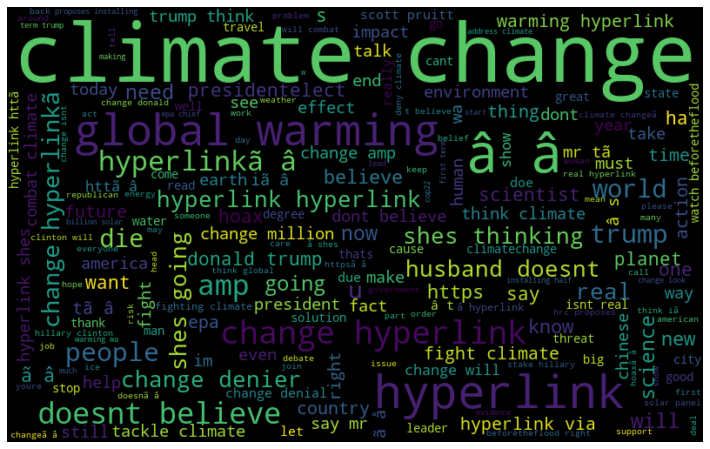

In [31]:
# Visualize frequent words for Class 1
all_words_c1 = " ".join([sentence for sentence in df['clean_tweet'][df['sentiment']==1]])
wordcloud_c1 = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_c1)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_c1, interpolation='bilinear')
plt.axis('off')
plt.show()

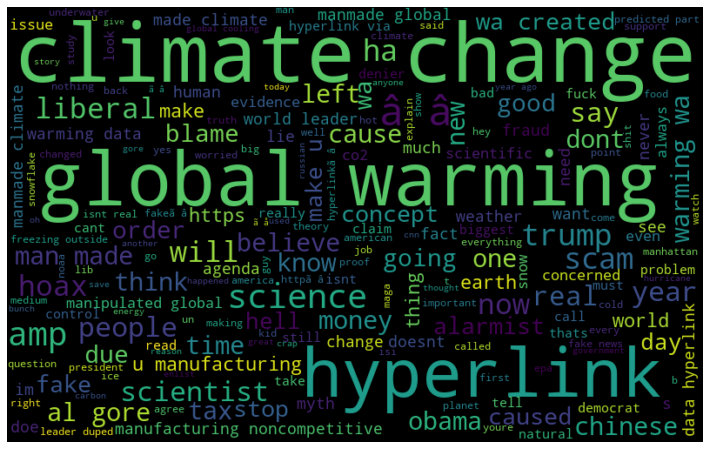

In [32]:
# Visualize frequent words for Class -1
all_words_cm1 = " ".join([sentence for sentence in df['clean_tweet'][df['sentiment']==-1]])
wordcloud_cm1 = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_cm1)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_cm1, interpolation='bilinear')
plt.axis('off')
plt.show()

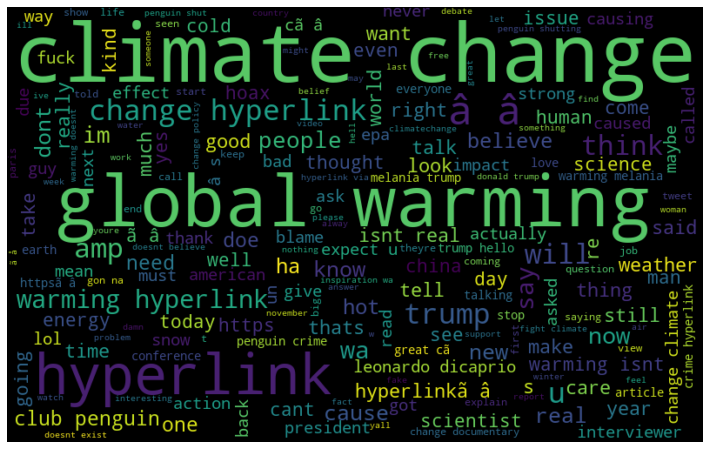

In [33]:
# Visualize frequent words for Class 0
all_words_c0 = " ".join([sentence for sentence in df['clean_tweet'][df['sentiment']==0]])
wordcloud_c0 = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_c0)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_c0, interpolation='bilinear')
plt.axis('off')
plt.show()

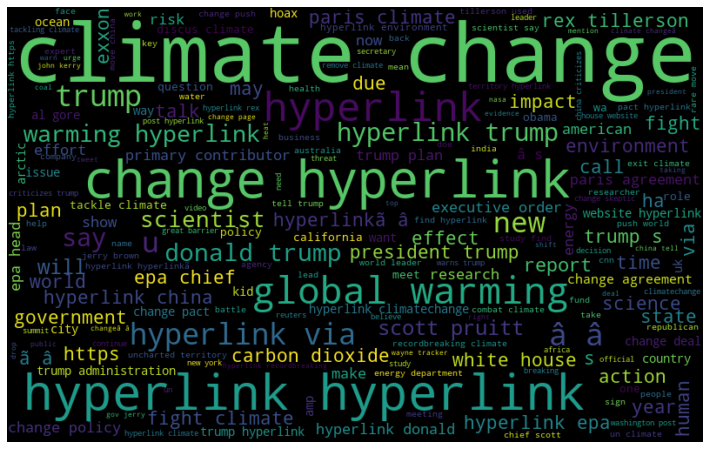

In [34]:
# Visualize frequent words for Class 2
all_words_c2 = " ".join([sentence for sentence in df['clean_tweet'][df['sentiment']==2]])
wordcloud_c2 = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_c2)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_c2, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Key Insights

- 


<a id="five"></a>
## 5. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Create targets and features dataframes then seperate the test from the train data set.

In [ ]:
# feature extraction

vector = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words=None, ngram_range=(1, 3)) #max_df=0?
X = vector.fit_transform(df['message'])
y = df['sentiment']

In [ ]:
# create targets and features dataset
#y =  df['sentiment']
#X = df.drop('sentiment', axis=1)

X = our features or independant variables (IVs). These will be used to predict our depedant variable. 

Y = dependant/target variable is also known as the dependent variable (DV) and is the target variable we want to predict.

In [ ]:
# split the train data further into train/test data (to perform validation before bringing in the true unseen test data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, shuffle=False)

### Feature Scaling

In [ ]:
#scaler = preprocessing.MinMaxScaler()
#X_scaled = scaler.fit_transform(X)

<a id="six"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

This section takes us through the machine learning process. We train and test a number of regression model algorithms and later select the model with the best performance to be used in this project. From the five modeling techniques, we compare the RMSE values of each model as well as the time taken to train and test each model. This will inform our model selection decision.

#### Model 1 - Logistic Regression

In [ ]:
# Training
model = LogisticRegression()
model.fit(X_train, y_train)

#### Model 2

#### Model 3

#### Model 4 

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
pred = model.predict(X_test)

In [ ]:
print('Classification Report')
print(classification_report(y_test, pred))

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



##### XGBoost Regression

This section discusses the inner workings of the best performing model in a simple way.

## Conclusion

Given two datasets, train and test data, we were tasked with following the data science process. 

We first set out to understand the data and it's space, in other words, we set out to understand the electricity shortfall in Spain, the various variables that may or may not be correlated to the load shortfall in Spain, understanding the reasons behind the correlations or a lack thereof etc. We were presented with a lot of information and our first task was making sure we had a good understanding of the relevant things coming from the data. 

In our data, we saw null values we had to impute, we encountered unusable data types we needed to transfrom, and data falling in large ranges which we had to scale. All of this formed part of the iterative process of Data Preprocessing, Exploratorty Data Analysis and Data Engineering.

Essentially, we set out to understand and transform the data so that we may build an appropriate model that would best predict the load shortfall. 

We then built a few models then selected the right model out of these models, following an iterative train-validation process. The main model performance metric was the Root Mean Squared Error (RMSE), looking for the model that produced the lowerst RMSE value.

At this point, we have addressed the problem statement. In future, when given various cirsumstances (predictor observations) we are now able to predict the corresponding load shortfall with an average error (RMSE) of approximately 4300 (same units as the predicted variable, i.e. load shortfall).

#### Kaggle submission file
This section creates the Kaggle submission file in csv format.

In [ ]:
df.head()

In [ ]:
df_test.head()

In [ ]:
x_train_final = df['message']
x_test_final = df_test['message']

In [ ]:
vector = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words=None, ngram_range=(1, 3)) #max_df=0?
x_train_final = vector.fit_transform(df['message'])
x_test_final = vector.fit_transform(df_test['message'])
y = df['sentiment']

In [ ]:
model.fit(x_train_final, y)

In [ ]:
predict_final = model.predict(x_test_final)

In [ ]:
daf = pd.DataFrame(predict_final, columns=['sentiment'])
daf.head()

In [ ]:
df_test_final = pd.read_csv('test_with_no_labels.csv')

In [ ]:
output = pd.DataFrame({"TweetID":df_test_final['tweetid']})
submission = output.join(daf)        
submission.to_csv("submission.csv", index=False)

In [ ]:
submission